In [3]:
from dataset import load_CleanNoisyPairDataset

clean_dir = './training_set/clean'
noisy_dir = './training_set/noisy'

dataset, dataloader = load_CleanNoisyPairDataset(clean_dir, noisy_dir)
print(f"Dataset size: {len(dataset)}")

Dataset size: 11572


Single item - Clean waveform shape: torch.Size([1, 48000])
Single item - Noisy waveform shape: torch.Size([1, 48000])


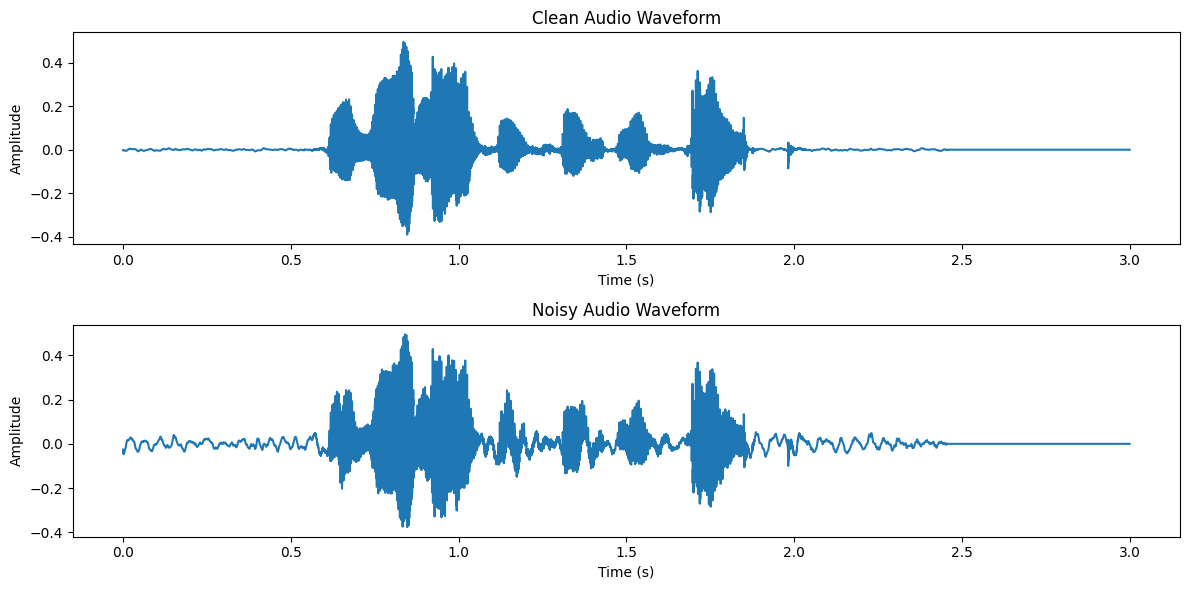

Clean Audio:


Noisy Audio:


In [4]:
from util import visualize_and_play_audio_pair
import random

# Accessing a single item from the dataset
rand = random.randint(0, len(dataset))
clean_wave, noisy_wave = dataset[rand]

print(f"Single item - Clean waveform shape: {clean_wave.shape}")
print(f"Single item - Noisy waveform shape: {noisy_wave.shape}")

visualize_and_play_audio_pair(clean_wave, noisy_wave, sample_rate=16000)

In [5]:
from train import train_cleanunet_with_val

clean_dir = './training_set/clean'
noisy_dir = './training_set/noisy'


train_cleanunet_with_val(clean_dir=clean_dir, noisy_dir=noisy_dir, batch_size=8, train_split_size=0.9, log_dir="./exp", exp_path="finetuned", ckpt_iter_arg="max",
      learning_rate=1e-5, ell_p=1, ell_p_lambda=1, n_iters=3000, stft_lambda= 1, iters_per_valid=5, iters_per_ckpt=500)

exp_path: finetuned
ckpt_directory:  ./exp\finetuned\checkpoint
Data loaded
CleanUNet Parameters: 46.071937M;  
Model at iteration 2000 has been trained for 11100 seconds
checkpoint model loaded successfully


c:\Users\imoua\OneDrive\Bureau\Speech Denoising\speech\Lib\site-packages\torch\functional.py:665: UserWarning: stft with return_complex=False is deprecated. In a future pytorch release, stft will return complex tensors for all inputs, and return_complex=False will raise an error.
Note: you can still call torch.view_as_real on the complex output to recover the old return format. (Triggered internally at ..\aten\src\ATen\native\SpectralOps.cpp:878.)
  return _VF.stft(input, n_fft, hop_length, win_length, window,  # type: ignore[attr-defined]


iteration: 2005 	train loss: 0.0686744 	val loss: 0.0750964
Best model saved at iteration 2005 with validation loss 0.0750964
iteration: 2010 	train loss: 0.0766038 	val loss: 0.0750942
Best model saved at iteration 2010 with validation loss 0.0750942
iteration: 2015 	train loss: 0.0821502 	val loss: 0.0750883
Best model saved at iteration 2015 with validation loss 0.0750883
iteration: 2020 	train loss: 0.0856013 	val loss: 0.0750850
Best model saved at iteration 2020 with validation loss 0.0750850
iteration: 2025 	train loss: 0.0623950 	val loss: 0.0750816
Best model saved at iteration 2025 with validation loss 0.0750816
iteration: 2030 	train loss: 0.1130499 	val loss: 0.0750810
Best model saved at iteration 2030 with validation loss 0.0750810
iteration: 2035 	train loss: 0.1153544 	val loss: 0.0750805
Best model saved at iteration 2035 with validation loss 0.0750805
iteration: 2040 	train loss: 0.0692187 	val loss: 0.0750800
Best model saved at iteration 2040 with validation loss 0.

KeyboardInterrupt: 

Test set size: 11572
Sample collected: 10200
CleanUNet Parameters: 46.071937M;  


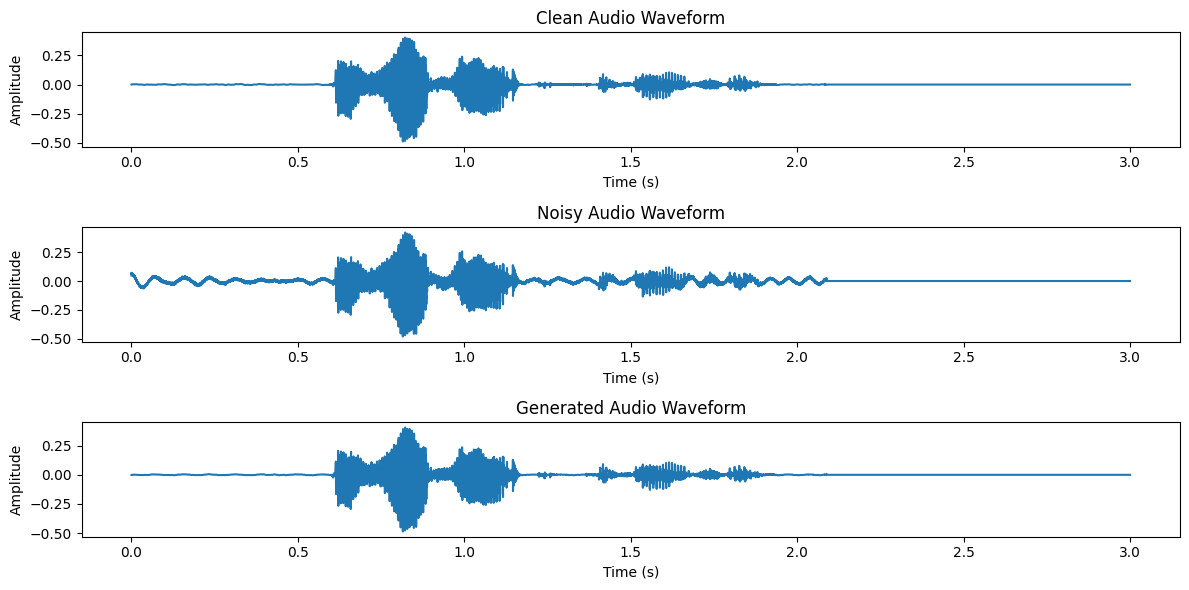

Clean Audio:


Noisy Audio:


Generated Audio: 


In [41]:
from util import visualize_and_play_audio_triplet
import numpy as np
from denoise import cleanunet_denoise_single_sample
from dataset import load_CleanNoisyPairDataset

clean_dir = './training_set/clean'
noisy_dir = './training_set/noisy'

test_set, _ = load_CleanNoisyPairDataset(clean_dir, noisy_dir)
print(f"Test set size: {len(test_set)}")
# Get a random sample
index = np.random.randint(0, len(test_set))

print(f'Sample collected: {index}')
clean_waveform, noisy_waveform = test_set[index]

clean_waveform, generated_waveform = cleanunet_denoise_single_sample(clean_waveform, noisy_waveform, model_path="./exp/finetuned/checkpoint/3000.pkl", sample_rate=16000)

visualize_and_play_audio_triplet(clean_waveform, noisy_waveform, generated_waveform, sample_rate=16000)

### Benchmarking the model trained for 2000 epochs

In [3]:
from denoise import cleanunet_denoise
import numpy as np

np.random.seed(1)

clean_dir = './test_set/clean'
noisy_dir = './test_set/noisy'

clean_audio, generated_audio =  cleanunet_denoise(clean_dir=clean_dir, noisy_dir=noisy_dir, batch_size=8, sample_rate=16000,
                                        output_directory="./exp", log_dir="./exp", exp_path="finetuned", ckpt_iter='best')

exp_path: finetuned
Data loaded
CleanUNet Parameters: 46.071937M;  
model path: ./exp\finetuned\checkpoint\best_model.pkl


100%|██████████| 103/103 [00:16<00:00,  6.40it/s]


Number of generated audio 824
Evaluation Results:
PESQ: 3.1004
STOI: 95.61
SNR: 19.3455 dB
CSIG: 2.6612786948142486
CBAK: 3.4064891779890307
COVRL: 2.5198304902717252
SRMR: 8.916808838592281


### Benchmarking the model trained for 3000 epochs 

In [8]:
from denoise import cleanunet_denoise
import numpy as np

np.random.seed(42)

clean_dir = './test_set/clean'
noisy_dir = './test_set/noisy'

clean_audio, generated_audio =  cleanunet_denoise(clean_dir=clean_dir, noisy_dir=noisy_dir, batch_size=8, sample_rate=16000,
                                        output_directory="./exp", log_dir="./exp", exp_path="finetuned", ckpt_iter='best')

exp_path: finetuned
Data loaded
CleanUNet Parameters: 46.071937M;  
model path: ./exp\finetuned\checkpoint\best_model.pkl


100%|██████████| 103/103 [00:13<00:00,  7.47it/s]


Number of generated audio 824
Evaluation Results:
PESQ: 3.0558
STOI: 95.41
SNR: 19.5249 dB
CSIG: 2.474550453484299
CBAK: 3.354665123297378
COVRL: 2.371768627438349
SRMR: 8.741298937424888
